# Quantum Fourier Transformation
***

In this lab, we will cover an important transformation used at the heart of many successful quantum algorithms: the
Quantum Fourier Transformation (QFT). QFT plays a major role in algorithms like Shor’s, Quantum Phase Estimation, Variational
Quantum Eigensolver, and many more. At their core, both the Hadamard Transformation and QFT transformations share a lot of similarities, both in their effect and
usage in quantum algorithms.



In order to make sure that all cells of code run properly throughout this lesson, please run the following cell of code below:

In [1]:
from qiskit import QuantumRegister , ClassicalRegister, QuantumCircuit , Aer , execute, transpile
from qiskit.providers.aer import StatevectorSimulator, QasmSimulator
from qiskit.visualization import visualize_transition, plot_histogram, circuit_drawer, plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector
import Our_Qiskit_Functions as oq
import numpy as np
import math as m
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

S_simulator = StatevectorSimulator()
M_simulator = QasmSimulator()

In [2]:
def Binary(N,total,LSB):
  '''
  Input: N (integer) total (integer) LSB (string)
  Returns the base-2 binary equivilant of N according to left or right least significant bit notation
  '''
  qubits = int(m.log(total, 2))
  b_num = np.zeros(qubits)
  for i in np.arange(qubits):
    if( N/((2)**(qubits-i-1)) >= 1):
      if (LSB == 'R'):
        b_num[i] = 1
      if(LSB== 'L'):
        b_num[int(qubits-(i+1))] = 1
      N = N - 2**(qubits-i-1)
  B = []
  for j in np.arange(len(b_num)): 
    B.append(int(b_num[j]))
  return B

In [3]:
'''
Do not worry about the length of this code block.
You dont need to understand this code.
It is only to help you view the wavefunction in a better way
'''

def Wavefunction( obj, *args, **kwargs):
  '''
  Displays the wavefunction of the quantum system
  '''
  if(type(obj) == QuantumCircuit):
    statevec = execute(obj, S_simulator, shots=1 ).result().get_statevector() 
  if(type(obj) == np.ndarray):
    statevec = obj
  sys = False
  NL = False
  dec = 5
  if 'precision' in kwargs:
    dec = int(kwargs['precision'] )  
  if 'column' in kwargs:  
    NL = kwargs['column']
  if 'systems' in kwargs:
    systems=kwargs['systems']
    sys = True
    last_sys= int(len(systems)-1)
    show_systems = []
    for s_chk in np.arange(len(systems)): 
      if( type(systems [s_chk])!=int ):
        raise Exception('systems must be an array of all integers')
    if 'show_systems' in kwargs: 
      show_systems = kwargs['show_systems']
      if(len(systems)!=len (show_systems) ):
        raise Exception('systems and show_systems need to be arrays of equal length')
      for ls in np.arange(len(show_systems)): 
        if((show_systems [ ls]!=True) and (show_systems [ ls] !=False)): 
          raise Exception('show_systems must be an array of Truth Values') 
        if(show_systems [ ls] ==True): 
          last_sys= int(ls)

    else:
      for ss in np.arange(len(systems)): 
        show_systems.append(True)
  wavefunction = ''
  qubits = int(m.log(len(statevec),2))
  for i in np.arange( int(len(statevec)) ): 
    value = round(statevec[int(i)].real, dec) + round(statevec[int(i)].imag, dec) * 1j
    if( (value.real!=0) or (value.imag!=0)): 
      state= list(Binary(int(i), int(2**qubits),'L'))
      state_str = ''
      if( sys == True ):    #Systems and Show Systems
        k = 0 
        for s in np.arange(len(systems)):
          if(show_systems [s]==True):
            if(int(s)!=last_sys):
              state.insert(int(k+systems [s]), '>|' ) 
              k = int(k+systems[s]+1)
            else:
              k = int(k+systems[s])
          else:
            for s2 in np.arange(systems [s]): 
              del state[int(k)]
      for j in np.arange(len(state)):
        if(type(state[j])!=str):
          state_str = state_str+str(int(state[j]))
        else:
          state_str = state_str+state[j]
      if ((value.real!=0) and (value.imag!=0)):
        if( value.imag> 0):
          wavefunction = wavefunction + str(value.real) + '+' + str(value.imag) + 'j |' + state_str + '>   '
        else:
          wavefunction = wavefunction + str(value.real) +'' + str(value.imag) + 'j |' + state_str + '>    '
      if( (value.real!=0) and (value.imag==0)): 
        wavefunction = wavefunction +str(value.real)+' |'+state_str +'>     '
      if((value.real==0) and (value.imag!=0)): 
        wavefunction = wavefunction +str(value.imag)+'j |'+state_str+ '>     '
      if (NL):
        wavefunction = wavefunction + '\n'
  print(wavefunction)

## Importance of Unitary Transformations
***
The success of any transformation can always be traced to the way it maps states. In particular, by studying the way a certain
transformation maps individual states, as well as how it maps combinations of states, we can learn about what types of advantages
it can achieved. Or in other words, a transformation provide us with two ’domains’ in which to work, where we can use the
advantages of each to solve complex problems. Visually, moving to a transformed basis in order to achieve some desired effect
looks like:

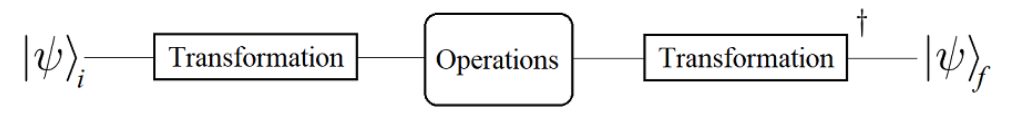

The operations we perform ’inside’ the transformation are dependent on the algorithm, and what type of problem we are trying
to solve.


If we have an operation that acts on N qubits, and can be decomposed into N individual Hermitian operators: O0 ⊗ O1 ⊗ O2 · · ·,
then the total operator is Hermitian as well. For example: Operator $O = H ⊗ X ⊗ Y ⊗ Z$.
In this example, we make up a 4-qubit operator, which can be decomposed as: $H_0 ⊗ X_1 ⊗ Y_2 ⊗ Z_3$ . Each of the individual
components is Hermitian, therefore the total operator is Hermitian as well. This is demonstrated by the fact that two applications
of this operator return us back to our original state.

Hence, now you would be able to appreciate the importance of Unitary Transformation. Here operator $O$ when operated on 4 qubits acts as a unitary transformation.

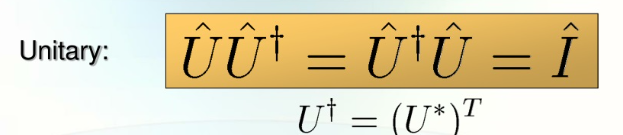

However,it is important to note that not all multi-qubit operations are their own complex conjugate. This is the case when operator uses
a specific ordering of gates. And in linear algebra, the order of operators is not always interchangeable. For example, consider a
single qubit operator that can be decomposed as: $X_0 Z_0$. As we can see, applying this operator twice does not return us to our original state. Thus, $X_0  Z_0$ is not a Hermitian operator,
even though it is made up of Hermitian components. If we define an operation that contains several gates that must act on the same qubit in a specific order, then chances are it won’t be Hermitian. So then, if our algorithm requires us to use such an
operator as a transformation, then we will need to find a different operator if we want to transform back. Specifically, we will
need the complex conjugate of the operator.

Luckily, if we know how to decompose an operation like the one in our example above, then finding the complex conjugate is as
simple as reversing the order (with one caveat that we will see later).

As you may have guessed, the reason we’ve gone out of our way to discuss non-Hermitian operations is because the transformation
we will be studying in this lesson is exactly that. The Quantum Fourier Transformation (QFT), which we will be using as the
core of the next couple lessons, is an example where $QFT$ and $QFT^{†}$ are different operations.

## Discrete Fourier Transformation
***
The QF T is essentially the Discrete Fourier Transformation (DFT), but applied to the states of our quantum system. Thus, we
will begin with a quick review the DFT. Formally written, the Discrete Fourier Transformation looks like this:

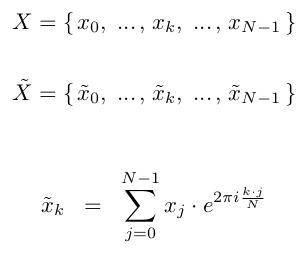

Where the DFT maps all of the numbers in $X$ to $X̃ $, and

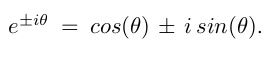

The DFT is defined by the sum above, which shows that each output value $x̃_k$ , receives a contribution from each input value $x_k$ .
Specifically, each input value is multiplied by a complex number of the form $e^{iθ}$ , which are then all summed together. The value
of each θ is determined by the multiplication of k·j  . Let’s see a quick example:

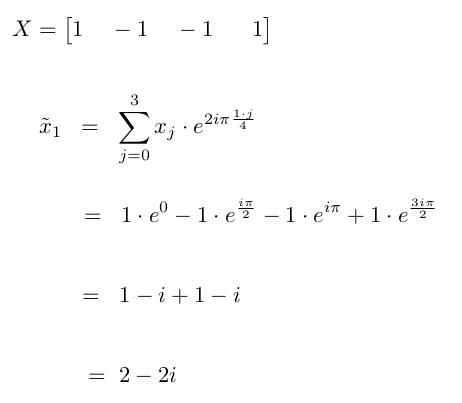

and the full transformation:

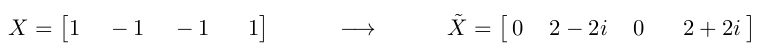

These eiθ terms are derived from the concept of taking the roots of -1, which we will not cover here. I encourage you to work
through all of the example above, as you will want to really develop a good feel for these transformations if you plan to continue
onto the upcoming algorithms in the course.
In particular, let’s see what this DFT looks like in a matrix representation:

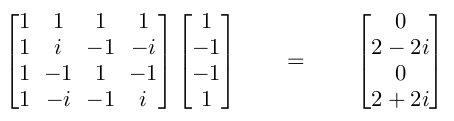

where the values in the matrix above can all be expressed in terms of:

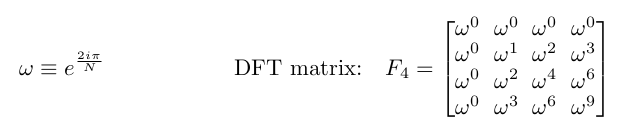

The powers on all of the ω’s come from the the products of k·j  , and N refers to the total number of values being transformed
(N = 4 for our example):

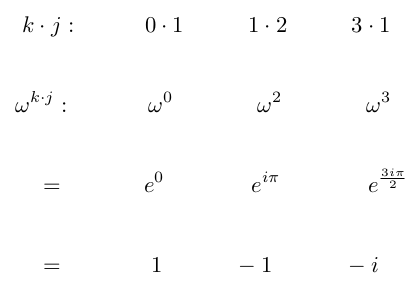

We could go on and on about the things one can do with DFT, but we will end our discussion here. I encourage you to read
other references about the Discrete Fourier Transformation, and the various things it can be used for. Doing so will help you get
a deeper understanding for why the QFT is so powerful.

## Quantum Fourier Transformation
***
We now have a formal definition for the Discrete Fourier Transformation, so how do we make it quantum? Well, we’ve already
shown how to represent the DFT as a matrix, so our task is to implement it as an operator. Since we are dealing with quantum
systems, we will naturally gravitate towards transformations of the size $2^N$.
Let’s use a 2-qubit example so illustrate how the DFT will look on a quantum system:

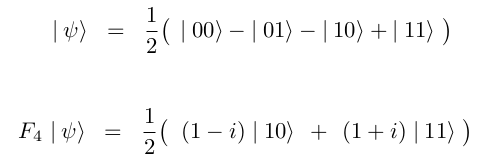

This example is the quantum version of our X → X̃ transformation from earlier. Our initial state corresponds to X, and our
final state is X̃. Verifying that is operation is indeed unitary is simple enough, which means that $F_4$ is a legitimate quantum
operation. And in general, any DFT matrix is guaranteed to be unitary.

For clarity, the vector representing the state of our system is in the following order:

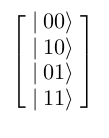

## Implementing a QFT
***

At this point, we have the structure for generating our QF T matrices, and the corresponding vector representations of our
states. From the mathematical perspective, we have the full picture for the QF T . However, as we’ve already seen with past
algorithms, simply writing it down doesn’t do it justice. And, if we want to actually run a QF T in our quantum algorithms, we
need a way of translating the mathematical picture into gates.

The way in which we are going to achieve our QFT ’s is quite elegant, and by no means obvious at first. As it turns out, the
only gates we need in order to construct a $2^N$ QFT are H and $R_φ$ : our trusty Hadamard gate along with some control-phase
gates. Even better yet, we will not require any additional ancilla qubits.

Below is the general template for how to construct a QFT circuit on N qubits, acting on a $2^N$ space of states:

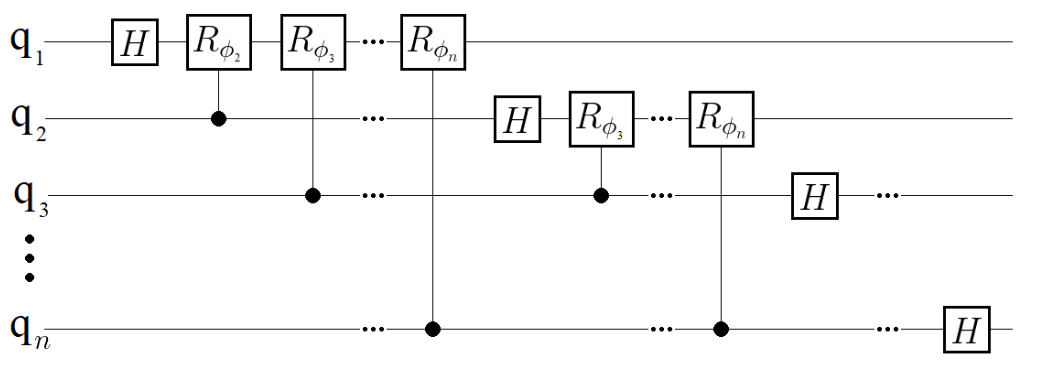

where 

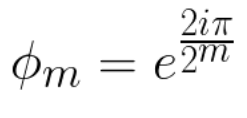

At first glance, this circuit may look a bit complex, but it is actually quite straightforward. Each qubit in the system undergoes
the same process: a Hadamard gate followed by a series of control-phase gates. The number of $R_φ$ gates that a qubit experiences
is determined by its index. The first qubit in the system receives N − 1, while the last qubit doesn’t receive any. In addition, the
phase of each $R_φ$ is determined by which qubit acts as the control, as shown by the equation above (note that we typically start
our first qubit as 0, but here we are starting with 1).

 Initial State:
0.5 |00>     -0.5 |10>     -0.5 |01>     0.5 |11>     

 After QFT:
0.5-0.5j |10>    0.5+0.5j |11>   


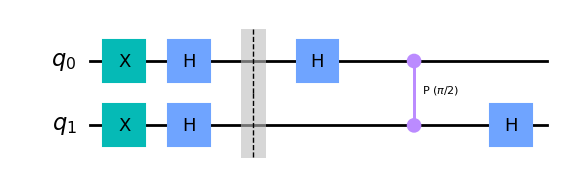

In [4]:
q  = QuantumRegister(2, name='q') 
F_qc = QuantumCircuit (q, name='qc')

F_qc.x( q[0]) 
F_qc.h( q[0])
F_qc.x( q[1])
F_qc.h( q[1])

print(' Initial State:')
Wavefunction (F_qc)

F_qc.barrier()

F_qc.h( q[0])
F_qc.cp(m.pi/2,q[1],q[0])
F_qc.h( q[1] )

print('\n After QFT:') 
Wavefunction(F_qc)

F_qc.draw('mpl')

Try and match the pattern in the template above, with the steps we’ve implemented in this code example.:

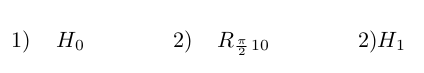

where the 10 subscript on the control-phase gate represents qubit 1 is the control, and qubit 0 is the target. Confirm for yourself
that these are indeed the steps written into our coding example, and that they match the QF T template.

Next, we will do one more example, thistime with 3 qubits:

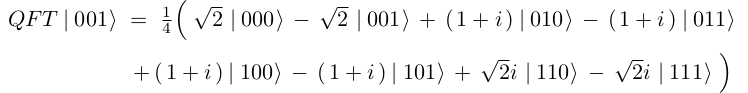

**Task**: For an extra exercise, try deriving this result by writing out the full 8×8 matrix for a 3-qubit transformation via our definitions
earlier.

Now to implement this transformation in code:

 Initial State:
1.0 |001>     
 
 After QFT:
0.35355 |000>     0.25+0.25j |100>   0.25+0.25j |010>   0.35355j |110>     -0.35355 |001>     -0.25-0.25j |101>    -0.25-0.25j |011>    -0.35355j |111>     


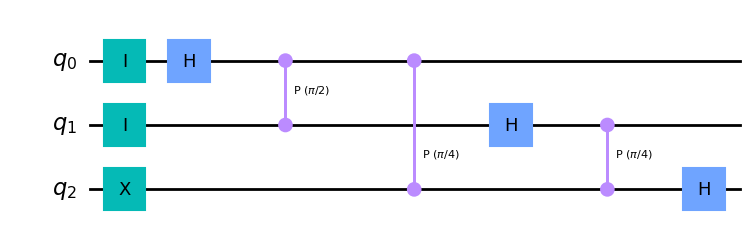

In [5]:
q = QuantumRegister(3, name='q') 
F_qc = QuantumCircuit (q, name='qc')

F_qc.id( q[0])

F_qc.id( q[1]) 

F_qc.x( q[2])

print(' Initial State:')
Wavefunction(F_qc)

# ------------------------------------------------------------- qubit 0

F_qc.h( q[0])

F_qc.cp( m.pi/2,q[1],q[0] ) 
F_qc.cp( m.pi/4,q[2],q[0] )


# ------------------------------------------------------------- qubit 1

F_qc.h( q[1] )
F_qc.cp( m.pi/4,q[2],q[1] )

# ------------------------------------------------------------- qubit 2

F_qc.h( q[2])

print(' \n After QFT:')

Wavefunction (F_qc)

F_qc.draw('mpl')

In this example, we’ve broken up the QF T instructions into three sections, where each section incorporates all of the operations
being applied to one of the three qubits. Just like in the QF T template shown above, the number of operations decreases by 1
per qubit, where the last qubit only receives a single H.

Ultimately, writing out all the steps for a QFT is a tedious task, so we will use the function QFT instead.

In [6]:
def QFT(qc,q,qubits):
  '''
  Assigns all the gate operations for a Quantum Fourier Transformation
  '''
  R_phis = [0]

  for i in np.arange(2,int (qubits+1)):
    R_phis.append( 2/(2**(i))* m.pi ) 
    
  for j in np.arange(int(qubits)):
    qc.h( q[int(j)] )
    for k in np.arange(j+1, int(qubits)):
      qc.cp( R_phis[k], q[int(k)], q[int(j)])

 Initial State:
1.0 |001>     

 After QFT:
0.35355 |000>     0.25+0.25j |100>   0.25+0.25j |010>   0.35355j |110>     -0.35355 |001>     -0.25-0.25j |101>    -0.25-0.25j |011>    -0.35355j |111>     


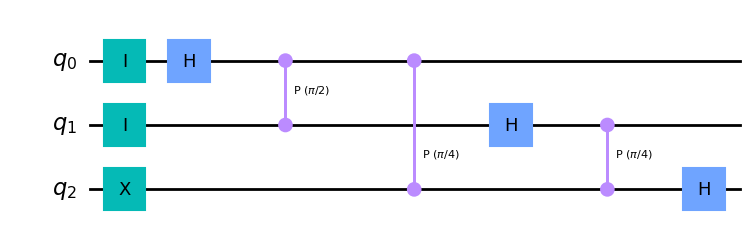

In [7]:
q = QuantumRegister(3, name='q')

F_qc = QuantumCircuit(q, name='qc')

F_qc.id( q[0])
F_qc.id( q[1] )
F_qc.x( q[2] )

print(' Initial State:')
Wavefunction(F_qc) 

QFT(F_qc,q,3)

print('\n After QFT:') 
Wavefunction(F_qc)

F_qc.draw('mpl')

## Why the QFT Circuit Works
***

Now that we have shown that we can implement a QFT , let’s talk about why it works. If you followed along the derivation of
the DFT matrix at the beginning of this lesson, then the way we are achieving these operations may seem surprisingly simple.
For example, take a look at all of the complexity happening in the 2-qubit QFT matrix from earlier, and then note that we
achieve all of this with only 2H’s and one $R_φ$ .

To make sense of how these gates are achieving all the desired phases, we will work through a 3-qubit example:

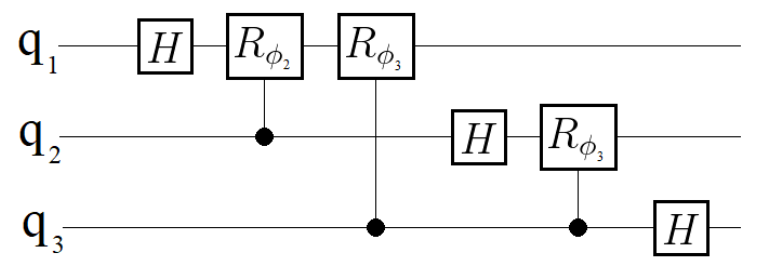

In particular, let’s start with $q_1$ , and see what its final state will look like at the end. We want to be general here, so we will say
that our qubit starts off in the state $|q_1⟩$, where $q_1$ is either a 0 or 1. Following along with all of the operations that $q_1$ receives:

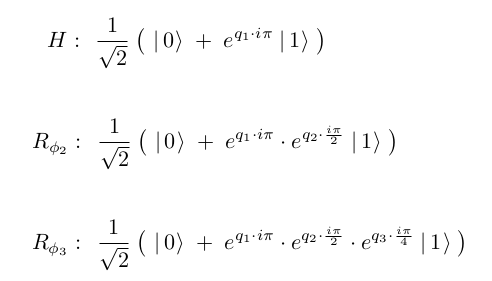

First, take a look at how we’ve chosen to write the effect of our Hadamard gate on $$ q_1 : \frac{1}{√2}(|0⟩ + e^{q_{1}·iπ}|1⟩ $$ Typically we
would write this with something like $(−1 )^{q_{1}}$ , where the state of $q_1$ determines whether or not the the Hadamard gate results in
a positive or negative |1⟩ state. Here however, we’ve chosen to express −1 as $e^{iπ}$ , in order to be consistent with the other gate
effects.

Next are the control-phase gates, which produce a similar effect to that of the Hadamard gate at first glance, but have an
important difference. Remember that control-phase gates only apply an effect when both the target and control qubits are in the |1⟩ state. This is why a H gate is necessary before any of the $R_φ$’s, to ensure that $q_1$ is in a superposition state of both |0⟩ and |1⟩. Then, effect of the $R_φ$ gate applies an additional phase to the |1⟩ component of $q_1$ .

However, because this is a control gate, and we must take into account that $q_2$ and $q_3$ may not be in the |1⟩ state, so there is an extra term multiplying each of the added phases, for example: $e^{q_{2}·\frac{iπ}{2}}$ . We can understand this extra term as
our condition that $q_2$ is in the |1⟩ state. If it is, then 1 times the rest of the power will leave it unchanged. But if $q_2$ is in
the |0⟩ state, then we will get $e^0$ , which is just a multiplication of $q_1$ by 1, meaning that no phase is applied to $q_1$’s |1⟩ component.

This pattern continues for each qubit, all the way down to the last. Each qubit receives a number of phases added to their |1i
component, which will then all be multiplied together in the final state:

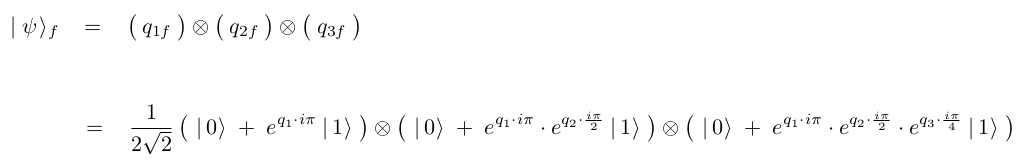

This is how we are able to achieve all of the various phases shown in the QFT matrices from earlier. Multiplying the states
and phases of each qubit together results in our normal $2^N$ states, where each state will be a unique combination of phases,
contributed by the |0⟩’s and |1⟩’s that make up the state. The math is still a little cumbersome, even for just three qubits, but
hopefully this illustrates the idea behind why we are able to achieve a QFT with this quantum circuit.

**Task** As a final optional exercise, I would encourage you to prove for yourself that mathematically our circuit representation is equal
to our matrix representation:

show that

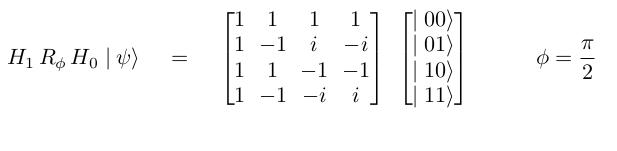

## **Inverse QFT**
***

Now that we have a way of transforming our system via a QFT , and hopefully a better intuition as to why it works, next we
need to be able to transform back. As we mentioned earlier, the power of using transformations in quantum algorithms relies on
being able to transform back and forth between bases. And as we’ve also mentioned already, our QFT transformation is not
Hermitian, so the same construction of gates will not transform us back.

Just to verify this, let’s try to use our QFT function twice:

 Initial State:
0.5 |00>     -0.5 |10>     -0.5 |01>     0.5 |11>     

 First QFT:
0.5-0.5j |10>    0.5+0.5j |11>   

 Second QFT:
0.5 |00>     -0.5j |01>     -0.5+0.5j |11>   


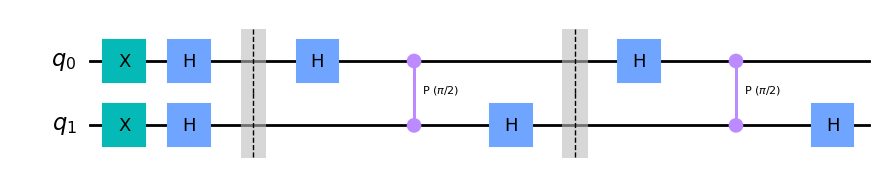

In [9]:
q = QuantumRegister(2, name='q') 
F_qc = QuantumCircuit (q, name='qc')

F_qc.x( q[0] )
F_qc.h( q[0])
F_qc.x( q[1] )
F_qc.h( q[1])

print(' Initial State:') 
Wavefunction (F_qc)

F_qc.barrier()

QFT (F_qc,q,2)

print('\n First QFT:') 
Wavefunction (F_qc)

F_qc.barrier()

QFT(F_qc,q,2)

print('\n Second QFT:')
Wavefunction(F_qc)

F_qc.draw('mpl')

Sure enough, we do not return to our original state. From our quantum computing perspective, we can understand why the QF T
doesn’t transform us back to our original state if we look at two QF T s in a row:

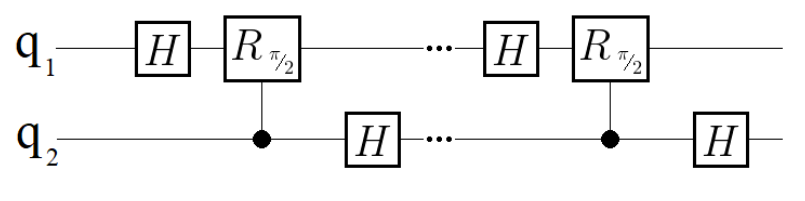

What should jump out at you is the apparent lack of symmetry here. Recall our example earlier of the gate XZ, and that the
correct inverse transformation was to change the order: ZX. Here, if we want to implement the inverse of our QFT , we will
need to invoke the same strategy of reversing the order of all the gates. In essence, imagine placing a mirror after our QFT , and
the reflection will be our inverse QFT , with one slight change:

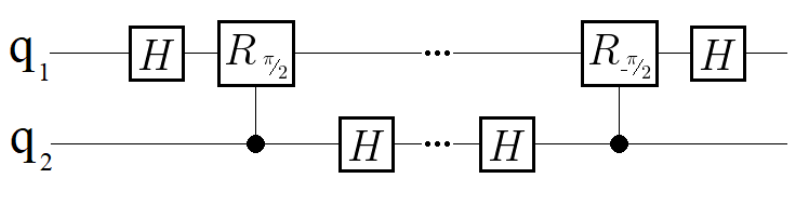

The slight change here is that our second $R_φ$ has the opposite sign of our first. Conceptually, this should make sense: if our
original transformation applies a phase θ, then our inverse should apply the opposite phase, - θ. As we pointed out earlier, the
inverse of a transformation needs to be the complex conjugate of the original, which is why we need negative phases on all of
the θ’s. All together, our inverse QFT must be the exact reverse ordering our QFT , with all opposite phases on the $R_φ$ gates:

 Initial State:
0.5 |00>     -0.5 |10>     -0.5 |01>     0.5 |11>     

 After QFT:
0.5-0.5j |10>    0.5+0.5j |11>   

 After Inverse QFT:
0.5 |00>     -0.5 |10>     -0.5 |01>     0.5 |11>     


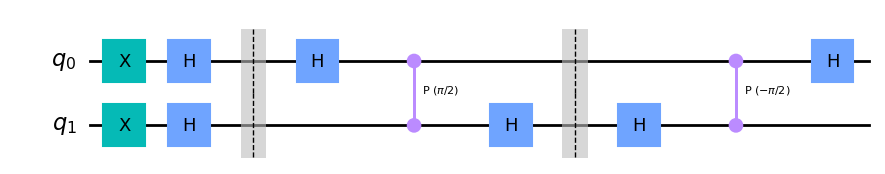

In [11]:
q = QuantumRegister(2, name='q') 
F_qc = QuantumCircuit (q, name='qc')

F_qc.x( q[0])
F_qc.h( q[0])
F_qc.x( q[1]) 
F_qc.h( q[1])

print(' Initial State:') 
Wavefunction(F_qc)

F_qc.barrier()

F_qc.h( q[0])
F_qc.cp( m.pi/2,q[1],q[0])
F_qc.h( q[1])

print('\n After QFT:')

Wavefunction(F_qc)

F_qc.barrier()

F_qc.h( q[1])
F_qc.cp(-m.pi/2,q[1],q[0])
F_qc.h( q[0])

print('\n After Inverse QFT:')
Wavefunction (F_qc)

F_qc.draw('mpl')

Sure enough, we recover our original state, which means that we performed the correct inverse transformation. And like our
QFT function, we can use QFT_dgr to implement our inverse QFT :

In [12]:
def QFT_dgr (qc, q, qubits):
  '''
  Assigns all the gate operations for an inverse Quantum Fourier Transformation
  '''
  R_phis = [0]

  for i in np.arange(2,int(qubits+1)):
    R_phis.append(-2/(2**(i))*m.pi )
  
  for j in np.arange(int(qubits)): 
    for k in np.arange( int(j) ):
      qc.cp(R_phis[int(qubits - (k+1))], q[int(qubits - (k+1))], q[int(qubits - (j+1))] )
    qc.h( q[int(qubits - (j+1))] )

 Initial State _
0.5 |00>     -0.5 |10>     -0.5 |01>     0.5 |11>     

 After QFT:
0.5-0.5j |10>    0.5+0.5j |11>   

 After Inverse QFT:
0.5 |00>     -0.5 |10>     -0.5 |01>     0.5 |11>     


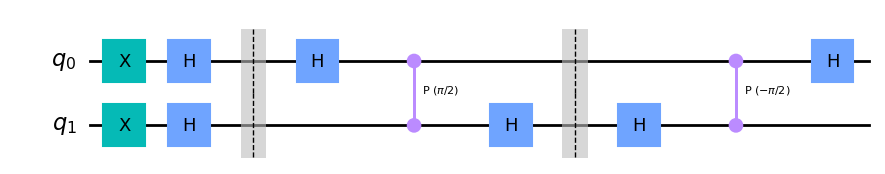

In [13]:
q = QuantumRegister(2, name='q') 
F_qc = QuantumCircuit(q, name='qc')

F_qc.x( q[0] )
F_qc.h( q[0])
F_qc.x( q[1]) 
F_qc.h( q[1] )

print(' Initial State _') 
Wavefunction(F_qc)

F_qc.barrier()

QFT(F_qc,q,2)

print('\n After QFT:') 
Wavefunction(F_qc) 

F_qc.barrier()

QFT_dgr(F_qc,q,2)

print('\n After Inverse QFT:') 
Wavefunction(F_qc)

F_qc.draw('mpl')

Now that we have QFT and QFT_dgr, we are finished covering the basics of the Quantum Fourier Transformation. In the next lab sessions, we will be using these QFT’s as the basis for some very important algorithms.

## References
***
1. Qiskit Community. "Quantum Fourier Transform." Qiskit, n.d., https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform. 
2. Jordan, Michael. "Lecture 20: Convex Optimization I." PDF file, University of California, Berkeley, Electrical Engineering and Computer Sciences, 2014. https://inst.eecs.berkeley.edu/~cs191/fa14/lectures/lecture20.pdf. 
